In [3]:
import pandas as pd
import numpy as np

#plotting graphs
import matplotlib.pyplot as plt

#machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#data fetching
from pandas_datareader import data as pdr

from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()

In [7]:
from google.colab import files
uploadfile = files.upload()

Saving CSVForDate(1).csv to CSVForDate(1).csv


In [8]:
df = pd.read_csv('CSVForDate(1).csv')
df.head(5)
final_data = df
final_data.head()

,index,Date,Open,High,Low,Close
0,0,01-Jan-15,27485.77,27545.61,27395.34,27507.54
1,1,02-Jan-15,27521.28,27937.47,27519.26,27887.90
2,2,05-Jan-15,27978.43,28064.49,27786.85,27842.32
3,3,06-Jan-15,27694.23,27698.93,26937.06,26987.46
4,4,07-Jan-15,26983.43,27051.60,26776.12,26908.82


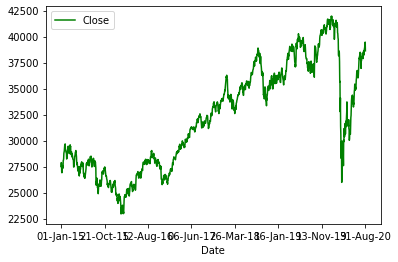

In [9]:
final_data.plot('Date','Close',color='g')
plt.show()

In [10]:
#predictor variable
df['Open-Close'] = df.Open - df.Close
df = df.dropna()
x = df[['Open-Close']]
x.head()

,Open-Close
0,-21.77
1,-366.62
2,136.11
3,706.77
4,74.61


In [11]:
#target variable
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [14]:
#splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

In [17]:
#instantiate KNN learning model(k=15) 
knn = KNeighborsClassifier(n_neighbors = 15)

# fit the model
knn.fit(x_train, y_train)

# accurate score
accuracy_train = accuracy_score(y_train, knn.predict(x_train))
accuracy_test = accuracy_score(y_test, knn.predict(x_test))

print('Train_data accuracy: %.2f' %accuracy_train)
print('Test_data accuracy: %.2f' %accuracy_test)

Train_data accuracy: 0.60
Test_data accuracy: 0.48


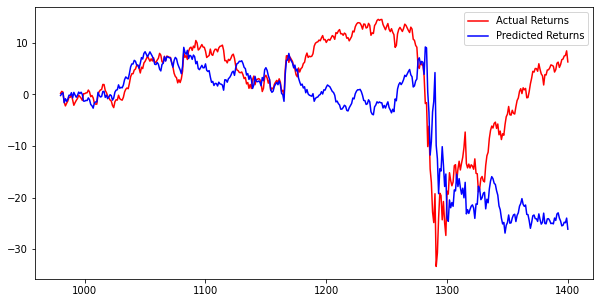

In [19]:
#predicted signal
df['predicted_signal'] = knn.predict(x)

# actual cumulative returns
df['Actual_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Actual_returns = df[split:]['Actual_returns'].cumsum()*100

# cumulative statergy returns
df['predicted_returns'] = df['Actual_returns']*df['predicted_signal'].shift(1)
Cumulative_Predicted_returns = df[split:]['predicted_returns'].cumsum()*100

# plotting the result
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Actual_returns, color='r', label = 'Actual Returns')
plt.plot(Cumulative_Predicted_returns, color = 'b', label= 'Predicted Returns')
plt.legend()
plt.show()